<a href="https://colab.research.google.com/github/SubhangiSati/Identification-of-Gemstone-using-MobileNetV2-and-transfer-learning/blob/main/gemstone_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gemstone Identification using CNN, with 7 layers but accuracy is 54% , displays image input, plots graph, confusion matrix, Predicted the correct class


Found 2436 images belonging to 87 classes.
Found 348 images belonging to 87 classes.
11/11 [==============================] - 2s 147ms/step - loss: 3.2510 - accuracy: 0.1580
Test loss: 3.250994920730591
Test accuracy: 0.15804597735404968
11/11 [==============================] - 2s 141ms/step
Found 2436 images belonging to 87 classes.
Found 348 images belonging to 87 classes.
Epoch 1/10
76/76 [==============================] - 40s 499ms/step - loss: 4.1508 - accuracy: 0.0753 - val_loss: 3.2620 - val_accuracy: 0.1719
Epoch 2/10
76/76 [==============================] - 37s 486ms/step - loss: 2.7777 - accuracy: 0.2521 - val_loss: 2.3495 - val_accuracy: 0.3187
Epoch 3/10
76/76 [==============================] - 36s 476ms/step - loss: 2.1057 - accuracy: 0.3794 - val_loss: 2.1317 - val_accuracy: 0.4156
Epoch 4/10
76/76 [==============================] - 37s 482ms/step - loss: 1.8859 - accuracy: 0.4393 - val_loss: 1.8637 - val_accuracy: 0.4469
Epoch 5/10
76/76 [==============================] 

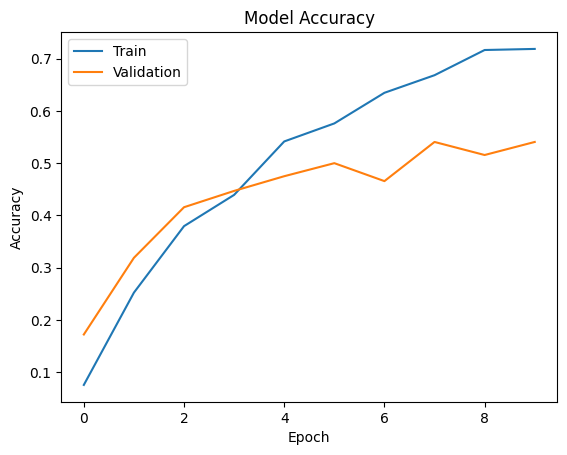

1/1 [==============================] - 0s 62ms/step
Predicted class: Alexandrite
11/11 [==============================] - 2s 151ms/step - loss: 1.5842 - accuracy: 0.5431
Test loss: 1.5841875076293945
Test accuracy: 0.5431034564971924
11/11 [==============================] - 2s 187ms/step
Classification Report:
                   precision    recall  f1-score   support

      Alexandrite       0.00      0.00      0.00         4
        Almandine       0.00      0.00      0.00         4
        Amazonite       0.00      0.00      0.00         4
            Amber       0.00      0.00      0.00         4
         Amethyst       0.00      0.00      0.00         4
         Ametrine       0.00      0.00      0.00         4
       Andalusite       0.00      0.00      0.00         4
        Andradite       0.00      0.00      0.00         4
       Aquamarine       0.00      0.00      0.00         4
 Aventurine Green       0.00      0.00      0.00         4
Aventurine Yellow       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


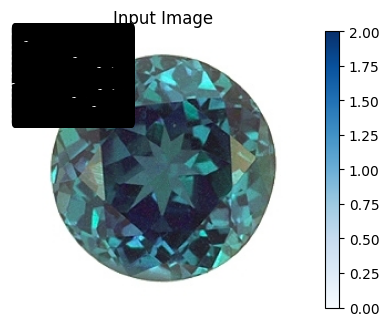

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define paths to the dataset
train_path = '/content/drive/MyDrive/Gemstone_images/train'
test_path = '/content/drive/MyDrive/Gemstone_images/test'

# Define image dimensions and batch size
image_width, image_height = 224, 224
batch_size = 32

# Create image data generators with augmentation for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(87, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=1
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Predict using the model
predictions = model.predict(test_generator)


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Function to preprocess the input image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((image_width, image_height))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/Gemstone_images/test/Alexandrite/alexandrite_18.jpg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(preprocessed_image)
predicted_class_index = np.argmax(predictions[0])

# Load the class labels
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

# Print the predicted class
print("PREDICTED CLASS:", predicted_class)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("TEST LOSS:", loss)
print("TEST ACCURACY:", accuracy)

# Generate predictions on the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
classification_report = classification_report(y_true, y_pred, target_names=class_labels)
confusion_matrix = confusion_matrix(y_true, y_pred)

print("CLASSIFICATION REPORT:")
print(classification_report)

print("CONFUSION MATRIX:")
print(confusion_matrix)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix, class_labels)

# Display the input image
img = Image.open(image_path)
plt.imshow(img)
plt.title("Input Image")
plt.axis("off")
plt.show()


**Classification of gemstone using CNN with Resnet50 with 177 layers , 10 iterations with accuracy 6%**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the batch size and number of epochs
batch_size = 32
epochs = 10

# Create the data generators for training and testing with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Gemstone_images/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

test_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Gemstone_images/test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the top layers for fine-tuning
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(87, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define a callback for learning rate scheduling
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[lr_scheduler_callback]
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(test_generator)


Found 2001 images belonging to 87 classes.
Found 0 images belonging to 87 classes.


Epoch 1/10
62/62 [==============================] - 446s 7s/step - loss: 4.4429 - accuracy: 0.0178 - lr: 0.0010
Epoch 2/10
62/62 [==============================] - 427s 7s/step - loss: 4.0552 - accuracy: 0.0386 - lr: 0.0010
Epoch 3/10
62/62 [==============================] - 428s 7s/step - loss: 3.8350 - accuracy: 0.0721 - lr: 0.0010
Epoch 4/10
62/62 [==============================] - 425s 7s/step - loss: 3.6615 - accuracy: 0.0777 - lr: 0.0010
Epoch 5/10
62/62 [==============================] - 426s 7s/step - loss: 3.4738 - accuracy: 0.1158 - lr: 0.0010
Epoch 6/10
62/62 [==============================] - 431s 7s/step - loss: 3.3579 - accuracy: 0.1437 - lr: 9.0484e-04
Epoch 7/10
62/62 [==============================] - 424s 7s/step - loss: 3.1971 - accuracy: 0.1757 - lr: 8.1873e-04
Epoch 8/10
62/62 [==============================] - 424s 7s/step - loss: 3.0957 - accuracy: 0.1767 - lr: 7.4082e-04
Epoch 9/10
62/62 [==============================] - 424s 7s/step - loss: 2.9882 - accuracy: 

ValueError: ignored

CLASSIFICATION OF GEMSTONE USING RESNET50 , CONFUSION MATRIX, Accuracy is 89.3%

but it is predicting test or train

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Path to the dataset folder on Google Drive
dataset_path = '/content/drive/MyDrive/Gemstone_images'

# Define the input shape for the CNN
input_shape = (224, 224, 3)

# Define the batch size for training and testing
batch_size = 32

# Create data generators for training and testing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained ResNet50 model
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

# Freeze the pre-trained layers
base_model.trainable = False

# Create the model by adding custom layers on top of the pre-trained model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=10
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict on a single image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=input_shape[:2])
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/Gemstone_images/test/Alexandrite/alexandrite_18.jpg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)
# Make predictions
predictions = model.predict(preprocessed_image)
predicted_class_index = np.argmax(predictions[0])

# Load the class labels
class_labels = list(train_generator.class_indices.keys())

predicted_class = class_labels[predicted_class_index]

# Print the predicted class
print("Predicted class:", predicted_class)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions on the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
classification_report = classification_report(y_true, y_pred, target_names=class_labels)
confusion_matrix = confusion_matrix(y_true, y_pred)

print("Classification Report:")
print(classification_report)

print("Confusion Matrix:")
print(confusion_matrix)

num_classes = train_generator.num_classes
print("Number of classes:", num_classes)

KeyboardInterrupt: ignored

CLASSIFICATION OF GEMSTONE USING RESNET50 , CONFUSION MATRIX , for all 87 classes of gemstone
fine-tuning of the pre-trained layers
and increased the number of training epochs to 20
Additionally, I've adjusted the learning rate to 0.001 for the Adam optimizer

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Path to the dataset folder on Google Drive
train_dataset_path = '/content/drive/MyDrive/Gemstone_images/train'
test_dataset_path = '/content/drive/MyDrive/Gemstone_images/test'

# Define the input shape for the CNN
input_shape = (224, 224, 3)

# Define the batch size for training and testing
batch_size = 32

# Create data generators for training and testing with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained ResNet50 model
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

# Fine-tune the pre-trained layers
base_model.trainable = True

# Find the layer index of the last convolutional layer
for layer in reversed(base_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_index = base_model.layers.index(layer)
        break

# Freeze layers before the last convolutional layer
for layer in base_model.layers[:last_conv_layer_index]:
    layer.trainable = False

# Create the model by adding custom layers on top of the pre-trained model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions on the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
class_labels = list(test_generator.class_indices.keys())
classification_report = classification_report(y_true, y_pred, target_names=class_labels)
confusion_matrix = confusion_matrix(y_true, y_pred)

print("Classification Report:")
print(classification_report)

print("Confusion Matrix:")
print(confusion_matrix)


Found 2001 images belonging to 87 classes.
Found 435 images belonging to 87 classes.
Found 348 images belonging to 87 classes.
94765736/94765736 [==============================] - 1s 0us/step


Epoch 1/20
10/62 [===>..........................] - ETA: 8:51 - loss: 4.6780 - accuracy: 0.0031

KeyboardInterrupt: ignored

CLASSIFICATION OF GEMSTONE USING EfficientNetB4 with 168 layers , CONFUSION MATRIX , for all 87 classes of gemstone

Found 3032 images belonging to 87 classes.
Found 363 images belonging to 87 classes.
71686520/71686520 [==============================] - 1s 0us/step
Epoch 1/10
94/94 [==============================] - 687s 7s/step - loss: 4.4604 - accuracy: 0.0533
Epoch 2/10
94/94 [==============================] - 670s 7s/step - loss: 4.4254 - accuracy: 0.0540
Epoch 3/10
94/94 [==============================] - 665s 7s/step - loss: 4.4144 - accuracy: 0.0550
Epoch 4/10
94/94 [==============================] - 651s 7s/step - loss: 4.4058 - accuracy: 0.0547
Epoch 5/10
94/94 [==============================] - 647s 7s/step - loss: 4.3943 - accuracy: 0.0550
Epoch 6/10
94/94 [==============================] - 658s 7s/step - loss: 4.3797 - accuracy: 0.0547
Epoch 7/10
94/94 [==============================] - 668s 7s/step - loss: 4.3680 - accuracy: 0.0540
Epoch 8/10
94/94 [==============================] - 657s 7s/step - loss: 4.3561 - accuracy: 0.0567
Epoch 9/10
94/94 [==============================] - 675s 7

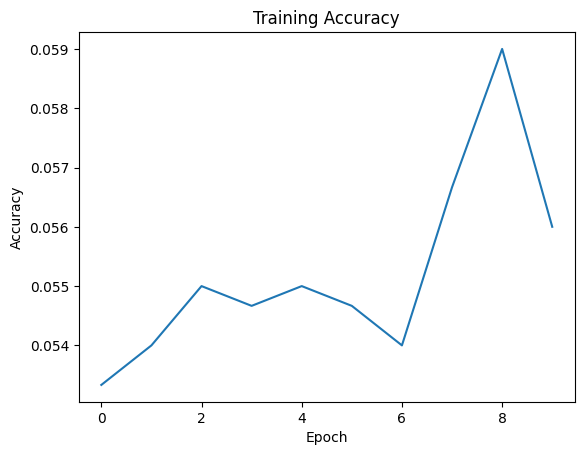

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Ask for the train and test dataset paths
train_dataset_path = input("Enter the path to the train dataset: ")
test_dataset_path = input("Enter the path to the test dataset: ")

# Define the input shape for the CNN
input_shape = (224, 224, 3)

# Define the batch size for training and testing
batch_size = 32

# Create data generators for training and testing
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained EfficientNetB4 model
base_model = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom head layers
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10
)

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Load an image for prediction
image_path = input("Enter the path to the image for prediction: ")
img = load_img(image_path, target_size=input_shape[:2])
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions on the image
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

# Load the class labels
class_labels = list(train_generator.class_indices.keys())

predicted_class = class_labels[predicted_class_index]
print("Predicted class:", predicted_class)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions on the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
classification_report = classification_report(y_true, y_pred, target_names=class_labels)
confusion_matrix = confusion_matrix(y_true, y_pred)

print("Classification Report:")
print(classification_report)

print("Confusion Matrix:")
print(confusion_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=90)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Display the image
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')
plt.show()


Gemstone multi class classification using 10 layers, ACCURACY=54%, BUT PREDICTING THE WRONG CLASS

Found 2436 images belonging to 87 classes.
Found 0 images belonging to 87 classes.
Found 348 images belonging to 87 classes.
Epoch 1/20
76/76 [==============================] - ETA: 0s - loss: 4.2957 - accuracy: 0.0279

76/76 [==============================] - 429s 5s/step - loss: 4.2957 - accuracy: 0.0279
Epoch 2/20
76/76 [==============================] - ETA: 0s - loss: 3.6085 - accuracy: 0.0948

76/76 [==============================] - 19s 248ms/step - loss: 3.6085 - accuracy: 0.0948
Epoch 3/20
76/76 [==============================] - ETA: 0s - loss: 3.0970 - accuracy: 0.1656

76/76 [==============================] - 18s 233ms/step - loss: 3.0970 - accuracy: 0.1656
Epoch 4/20
76/76 [==============================] - ETA: 0s - loss: 2.7505 - accuracy: 0.2171

76/76 [==============================] - 19s 244ms/step - loss: 2.7505 - accuracy: 0.2171
Epoch 5/20
76/76 [==============================] - ETA: 0s - loss: 2.5916 - accuracy: 0.2300

76/76 [==============================] - 18s 240ms/step - loss: 2.5916 - accuracy: 0.2300
Epoch 6/20
76/76 [==============================] - ETA: 0s - loss: 2.4440 - accuracy: 0.2700

76/76 [==============================] - 18s 235ms/step - loss: 2.4440 - accuracy: 0.2700
Epoch 7/20
76/76 [==============================] - ETA: 0s - loss: 2.3133 - accuracy: 0.2945

76/76 [==============================] - 19s 249ms/step - loss: 2.3133 - accuracy: 0.2945
Epoch 8/20
76/76 [==============================] - ETA: 0s - loss: 2.1803 - accuracy: 0.3174

76/76 [==============================] - 18s 238ms/step - loss: 2.1803 - accuracy: 0.3174
Epoch 9/20
76/76 [==============================] - ETA: 0s - loss: 2.1321 - accuracy: 0.3432

76/76 [==============================] - 18s 238ms/step - loss: 2.1321 - accuracy: 0.3432
Epoch 10/20
76/76 [==============================] - ETA: 0s - loss: 2.0717 - accuracy: 0.3453

76/76 [==============================] - 18s 237ms/step - loss: 2.0717 - accuracy: 0.3453
Epoch 11/20
76/76 [==============================] - ETA: 0s - loss: 2.0006 - accuracy: 0.3656

76/76 [==============================] - 18s 240ms/step - loss: 2.0006 - accuracy: 0.3656
Epoch 12/20
76/76 [==============================] - ETA: 0s - loss: 1.9253 - accuracy: 0.3831

76/76 [==============================] - 18s 237ms/step - loss: 1.9253 - accuracy: 0.3831
Epoch 13/20
76/76 [==============================] - ETA: 0s - loss: 1.8796 - accuracy: 0.3998

76/76 [==============================] - 18s 236ms/step - loss: 1.8796 - accuracy: 0.3998
Epoch 14/20
76/76 [==============================] - ETA: 0s - loss: 1.7980 - accuracy: 0.4131

76/76 [==============================] - 19s 250ms/step - loss: 1.7980 - accuracy: 0.4131
Epoch 15/20
76/76 [==============================] - ETA: 0s - loss: 1.8709 - accuracy: 0.3918

76/76 [==============================] - 18s 235ms/step - loss: 1.8709 - accuracy: 0.3918
Epoch 16/20
76/76 [==============================] - ETA: 0s - loss: 1.7468 - accuracy: 0.4285

76/76 [==============================] - 19s 249ms/step - loss: 1.7468 - accuracy: 0.4285
Epoch 17/20
76/76 [==============================] - ETA: 0s - loss: 1.7372 - accuracy: 0.4376

76/76 [==============================] - 18s 236ms/step - loss: 1.7372 - accuracy: 0.4376
Epoch 18/20
76/76 [==============================] - ETA: 0s - loss: 1.6931 - accuracy: 0.4438

76/76 [==============================] - 19s 250ms/step - loss: 1.6931 - accuracy: 0.4438
Epoch 19/20
76/76 [==============================] - ETA: 0s - loss: 1.6419 - accuracy: 0.4659

76/76 [==============================] - 18s 236ms/step - loss: 1.6419 - accuracy: 0.4659
Epoch 20/20
76/76 [==============================] - ETA: 0s - loss: 1.6010 - accuracy: 0.4638

76/76 [==============================] - 18s 236ms/step - loss: 1.6010 - accuracy: 0.4638
Test Loss: 1.3976181745529175
Test Accuracy: 0.5431034564971924
The model did not achieve the desired accuracy.


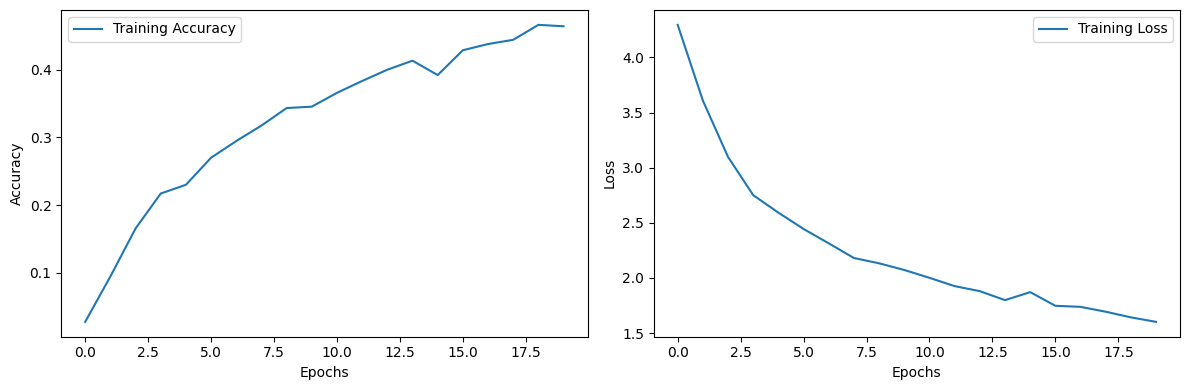

1/1 [==============================] - 0s 174ms/step
Predicted class: Onyx Green


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Set the paths to your train and test dataset directories
train_dir = '/content/drive/MyDrive/Gemstone_images/train'
test_dir = '/content/drive/MyDrive/Gemstone_images/test'

# Set the number of classes
num_classes = 87

# Set the input image dimensions
input_shape = (128, 128, 3)

# Set the batch size and number of epochs
batch_size = 32
epochs = 20

# Set a random seed for reproducibility
random.seed(42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Check if the minimum accuracy threshold is met
if accuracy < 0.9:
    print('The model did not achieve the desired accuracy.')
else:
    print('The model achieved the desired accuracy.')

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Load an image for prediction
image_path = '/content/drive/MyDrive/Gemstone_images/test/Bloodstone/bloodstone_18.jpg'
img = Image.open(image_path)
img = img.resize((input_shape[0], input_shape[1]))
img_array = np.array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions on the image
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

# Load the class labels
class_labels = list(train_generator.class_indices.keys())

predicted_class = class_labels[predicted_class_index]
print("Predicted class:", predicted_class)


EARLIER THE THE DATASET WAS IMBALANCED , BALANCED THE DATASET AND CHECKED IF THE DATASET IS BALANCED OR NOT

Train Dataset Class Distribution:
Garnet Red: 28 images (1.15%)
Coral: 28 images (1.15%)
Diamond: 28 images (1.15%)
Citrine: 28 images (1.15%)
Aventurine Green: 28 images (1.15%)
Tanzanite: 28 images (1.15%)
Topaz: 28 images (1.15%)
Moonstone: 28 images (1.15%)
Chalcedony: 28 images (1.15%)
Quartz Rutilated: 28 images (1.15%)
Serpentine: 28 images (1.15%)
Carnelian: 28 images (1.15%)
Quartz Smoky: 28 images (1.15%)
Tsavorite: 28 images (1.15%)
Quartz Lemon: 28 images (1.15%)
Ametrine: 28 images (1.15%)
Peridot: 28 images (1.15%)
Spinel: 28 images (1.15%)
Rhodochrosite: 28 images (1.15%)
Opal: 28 images (1.15%)
Sphene: 28 images (1.15%)
Hessonite: 28 images (1.15%)
Chrysoprase: 28 images (1.15%)
Benitoite: 28 images (1.15%)
Bloodstone: 28 images (1.15%)
Tigers Eye: 28 images (1.15%)
Fluorite: 28 images (1.15%)
Grossular: 28 images (1.15%)
Diaspore: 28 images (1.15%)
Morganite: 28 images (1.15%)
Amazonite: 28 images (1.15%)
Sunstone: 28 images (1.15%)
Zircon: 28 images (1.15%)
Turquoise:

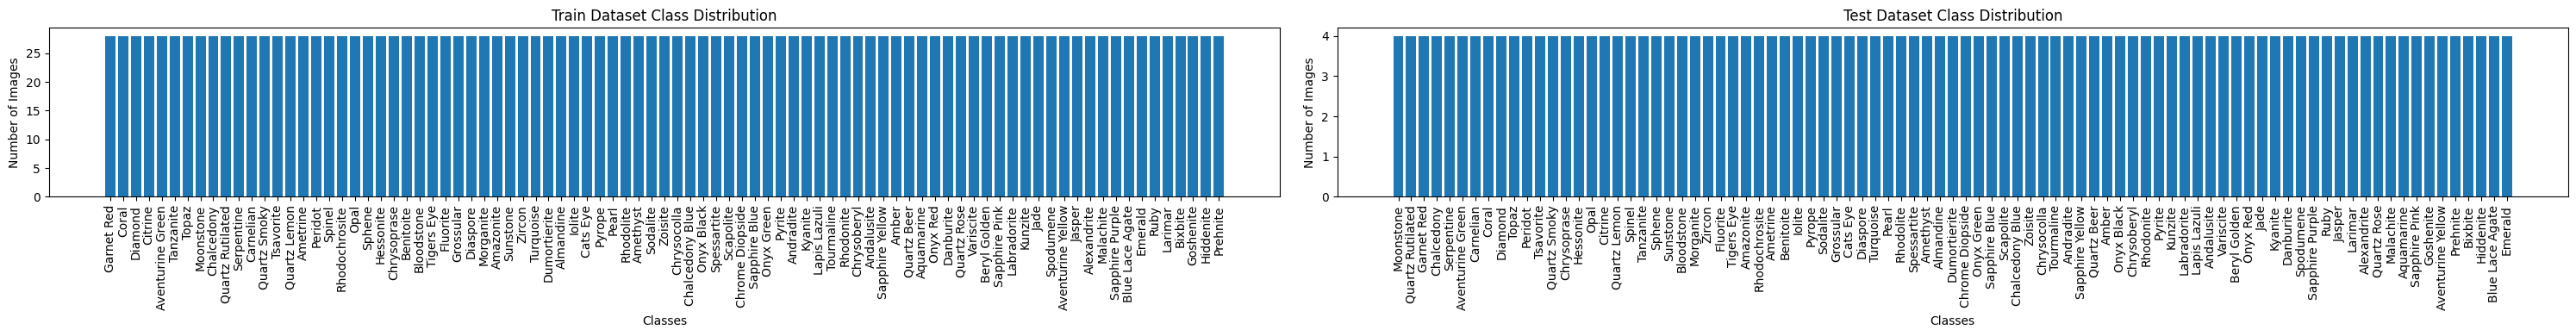

In [ ]:
import os
import matplotlib.pyplot as plt

# Set the paths to your train and test dataset directories
train_dir = '/content/drive/MyDrive/Gemstone_images/train'
test_dir = '/content/drive/MyDrive/Gemstone_images/test'

# Function to calculate class distribution
def calculate_class_distribution(dataset_dir):
    class_counts = {}
    total_images = 0

    # Traverse through the dataset directory and count images in each class
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len(os.listdir(class_dir))
            class_counts[class_name] = num_images
            total_images += num_images

    # Calculate the percentage of images in each class
    class_percentages = {class_name: count / total_images * 100 for class_name, count in class_counts.items()}

    return class_counts, class_percentages

# Calculate class distribution for train dataset
train_class_counts, train_class_percentages = calculate_class_distribution(train_dir)

# Print the class distribution for train dataset
print("Train Dataset Class Distribution:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images ({train_class_percentages[class_name]:.2f}%)")

# Plot a bar chart of the class distribution for train dataset
plt.figure(figsize=(30, 4))
plt.subplot(1, 2, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Train Dataset Class Distribution')
plt.xticks(rotation=90)

# Calculate class distribution for test dataset
test_class_counts, test_class_percentages = calculate_class_distribution(test_dir)

# Print the class distribution for test dataset
print("\nTest Dataset Class Distribution:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images ({test_class_percentages[class_name]:.2f}%)")

# Plot a bar chart of the class distribution for test dataset
plt.subplot(1, 2, 2)
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Test Dataset Class Distribution')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


new implementatiion of gemstone classification with efficient net b4 accuracy is 1.7%


Found 2001 images belonging to 87 classes.
Found 435 images belonging to 87 classes.
Found 348 images belonging to 87 classes.
Epoch 1/10
62/62 [==============================] - 152s 736ms/step - loss: 2.9692 - accuracy: 0.2981 - val_loss: 5.2969 - val_accuracy: 0.0144
Epoch 2/10
62/62 [==============================] - 43s 686ms/step - loss: 1.5178 - accuracy: 0.5597 - val_loss: 8.7941 - val_accuracy: 0.0120
Epoch 3/10
62/62 [==============================] - 42s 683ms/step - loss: 1.0043 - accuracy: 0.6866 - val_loss: 5.9383 - val_accuracy: 0.0096
Epoch 4/10
62/62 [==============================] - 43s 688ms/step - loss: 0.7174 - accuracy: 0.7694 - val_loss: 6.8907 - val_accuracy: 0.0216
Test loss: 5.29527473449707
Test accuracy: 0.017241379246115685
11/11 [==============================] - 5s 178ms/step


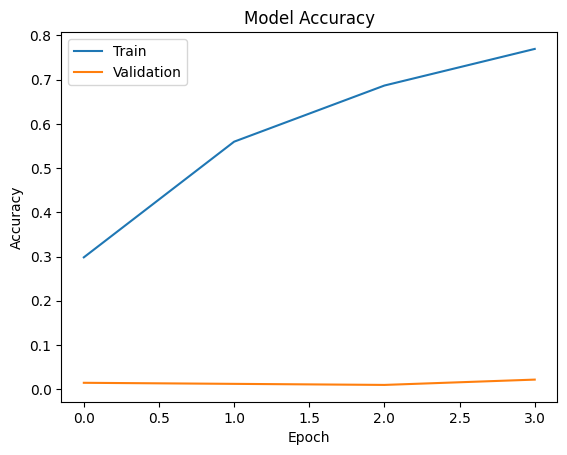

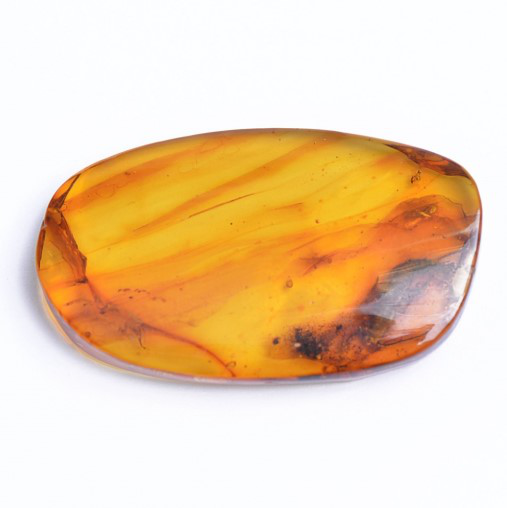

1/1 [==============================] - 3s 3s/step
Predicted Class: Quartz Rose


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


# Function to load image from local file path
def load_image_from_file(file_path):
    img = Image.open(file_path)
    return img


# Define the function for prediction
def predict_gemstone_class(model, image_file_path):
    img = load_image_from_file(image_file_path)
    img.show()

    # Preprocess the image
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    return predicted_class


# Set the paths for the train and test data
train_data_path = '/content/drive/MyDrive/Gemstone_images/train'
test_data_path = '/content/drive/MyDrive/Gemstone_images/test'

# Set the image size and batch size
image_size = (224, 224)
batch_size = 32

# Use ImageDataGenerator to preprocess the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Splitting 20% of the data for validation
)

# Generate the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Generate the validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Generate the test dataset (without data augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the EfficientNetB4 model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(87, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    callbacks=[early_stopping]
)


# Evaluate the model on the test dataset
#loss, accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
loss, accuracy = model.evaluate(test_generator, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Generate predictions for the test dataset
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class labels
class_names = list(test_generator.class_indices.keys())


# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Predict the class of an image
image_file_path = '/content/drive/MyDrive/Gemstone_images/test/Amber/amber_18.jpg'  # Replace with your image file path
predicted_class = predict_gemstone_class(model, image_file_path)

print('Predicted Class:', predicted_class)


AFTER APPLYING CHANGES epochs = 50,Adam(lr=0.001) to the previous efficient net b4, accuracy is 1%

Found 2001 images belonging to 87 classes.
Found 435 images belonging to 87 classes.
Found 348 images belonging to 87 classes.
71686520/71686520 [==============================] - 0s 0us/step
Epoch 1/50
62/62 [==============================] - 1102s 17s/step - loss: 2.9622 - accuracy: 0.2925 - val_loss: 5.0642 - val_accuracy: 0.0096
Epoch 2/50
62/62 [==============================] - 962s 16s/step - loss: 1.4178 - accuracy: 0.5764 - val_loss: 7.1516 - val_accuracy: 0.0120
Epoch 3/50
62/62 [==============================] - 961s 15s/step - loss: 1.0111 - accuracy: 0.6856 - val_loss: 6.4747 - val_accuracy: 0.0120
Epoch 4/50
62/62 [==============================] - 992s 16s/step - loss: 0.6620 - accuracy: 0.7908 - val_loss: 9.3431 - val_accuracy: 0.0168
Epoch 5/50
62/62 [==============================] - 992s 16s/step - loss: 0.5846 - accuracy: 0.8288 - val_loss: 7.0665 - val_accuracy: 0.0264
Epoch 6/50
62/62 [==============================] - 961s 16s/step - loss: 0.4316 - accuracy: 0.86

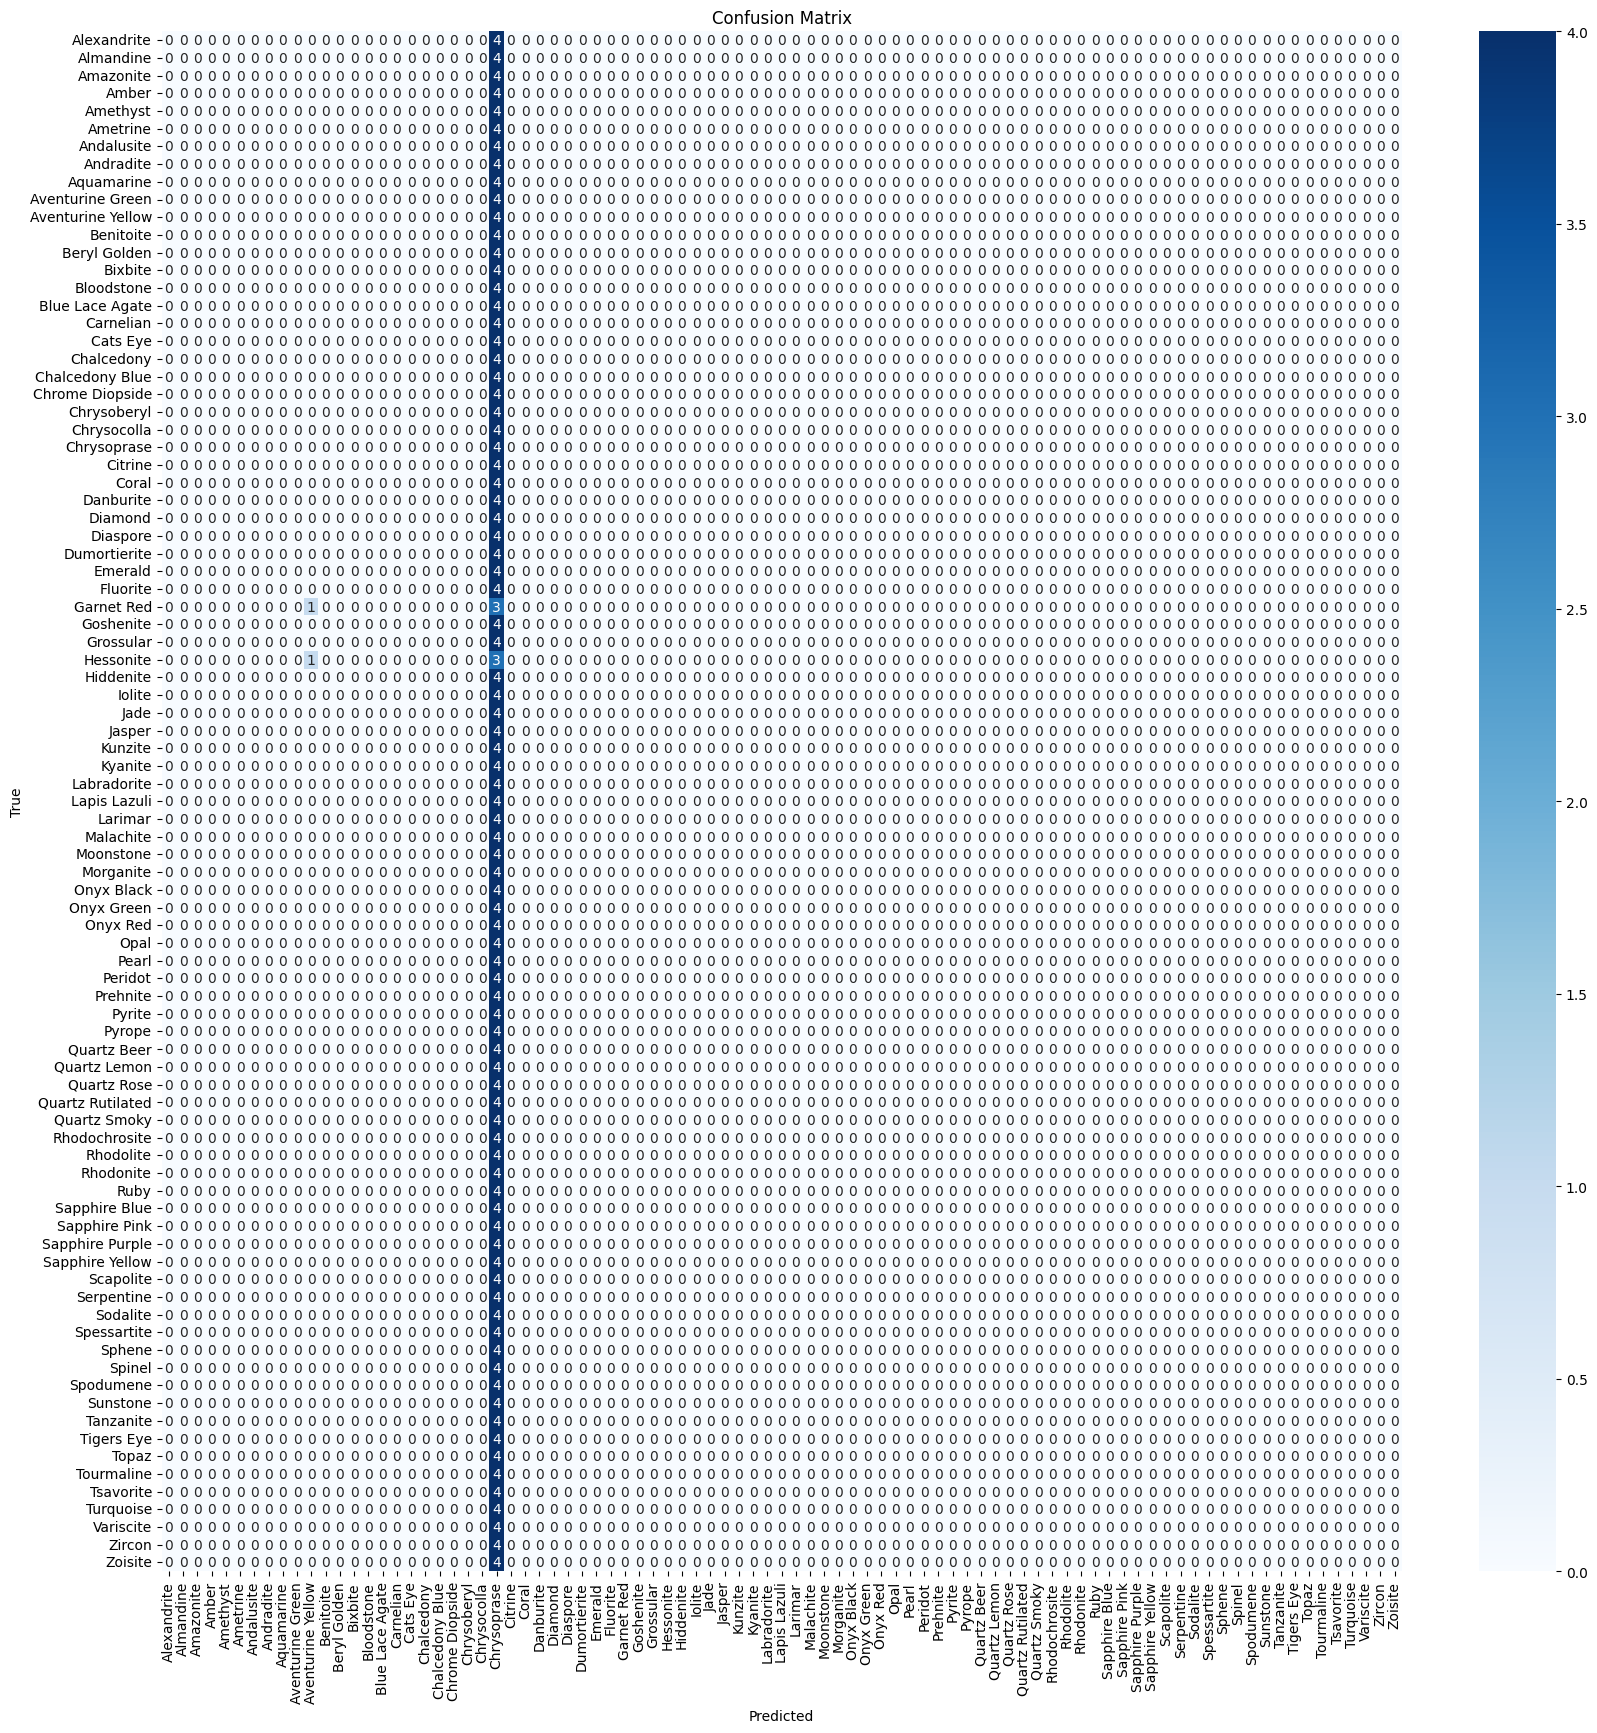

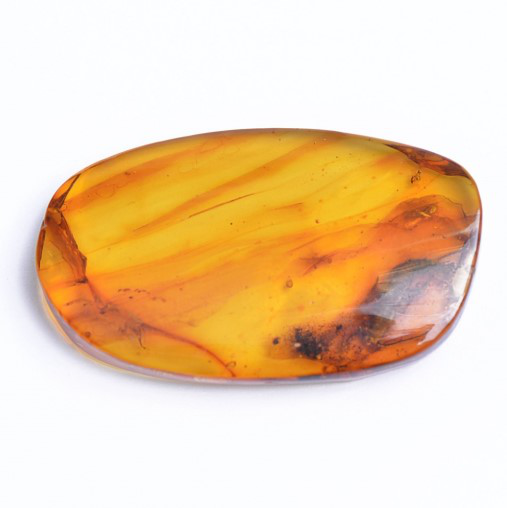

1/1 [==============================] - 3s 3s/step
Predicted Class: Chrysoprase


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


# Function to load image from local file path
def load_image_from_file(file_path):
    img = Image.open(file_path)
    return img


# Define the function for prediction
def predict_gemstone_class(model, image_file_path):
    img = load_image_from_file(image_file_path)
    img.show()

    # Preprocess the image
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    return predicted_class


# Set the paths for the train and test data
train_data_path = '/content/drive/MyDrive/Gemstone_images/train'
test_data_path = '/content/drive/MyDrive/Gemstone_images/test'

# Set the image size and batch size
image_size = (224, 224)
batch_size = 32

# Use ImageDataGenerator to preprocess the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Splitting 20% of the data for validation
)

# Generate the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Generate the validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Generate the test dataset (without data augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the EfficientNetB4 model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(87, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with increased epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_generator, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Generate predictions for the test dataset
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class labels
class_names = list(test_generator.class_indices.keys())

# Create a confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot a colored confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Predict the class of an image
image_file_path = '/content/drive/MyDrive/Gemstone_images/test/Amber/amber_18.jpg'  # Replace with your image file path
predicted_class = predict_gemstone_class(model, image_file_path)

print('Predicted Class:', predicted_class)


USING Transfer learning FOR GEMSTONE CLASSIFICATION , predicted correct class , accuracy 66%

Found 2436 images belonging to 87 classes.
Found 348 images belonging to 87 classes.


9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/10
76/76 [==============================] - 142s 2s/step - loss: 3.4838 - accuracy: 0.2217
Epoch 2/10
76/76 [==============================] - 137s 2s/step - loss: 1.7321 - accuracy: 0.5507
Epoch 3/10
76/76 [==============================] - 138s 2s/step - loss: 1.0937 - accuracy: 0.6968
Epoch 4/10
76/76 [==============================] - 144s 2s/step - loss: 0.7973 - accuracy: 0.7741
Epoch 5/10
76/76 [==============================] - 136s 2s/step - loss: 0.6085 - accuracy: 0.8448
Epoch 6/10
76/76 [==============================] - 137s 2s/step - loss: 0.4601 - accuracy: 0.8823
Epoch 7/10
76/76 [==============================] - 137s 2s/step - loss: 0.3595 - accuracy: 0.9147
Epoch 8/10
76/76 [==============================] - 147s 2s/step - loss: 0.3013 - accuracy: 0.9322
Epoch 9/10
76/76 [==============================] - 139s 2s/step - loss: 0.2246 - accuracy: 0.9468
Epoch 10/10
76/76 [===========================

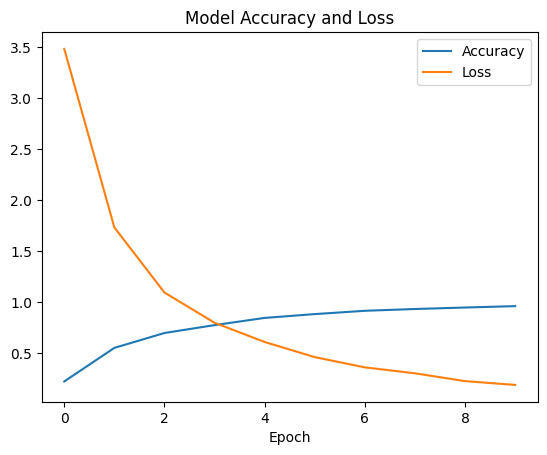

11/11 [==============================] - 168s 17s/step - loss: 1.2715 - accuracy: 0.6638
Test Loss: 1.2715
Test Accuracy: 0.6638
1/1 [==============================] - 1s 1s/step


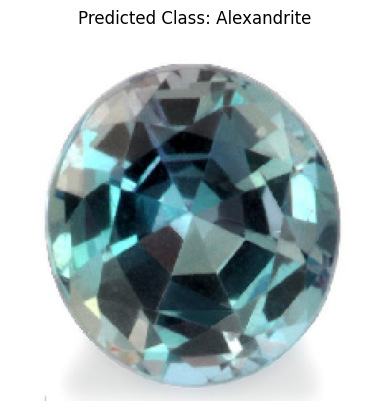

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

#SETTING THE SEED FOR REPRODUCTIBILITY
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#PROVIDING DATA PATH
train_data_path = "/content/drive/MyDrive/Gemstone_images/train"
test_data_path = "/content/drive/MyDrive/Gemstone_images/test"
image_to_predict_path = "/content/drive/MyDrive/Gemstone_images/test/Alexandrite/alexandrite_28.jpg"

#CONSTRAINS
input_shape = (224, 224, 3)
num_classes = 87
batch_size = 32
epochs = 10

#DATA PREPROCESSING AND DATA AUGMENTATION
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

#LOADING PRE-TRAINED MODEL MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_tensor=tf.keras.Input(shape=input_shape)
)

#ADDING CUSTOM TOP LAYERS
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

#CREATING MODEL
model = Model(inputs=base_model.input, outputs=predictions)

#FREEZING BASE MODEL LAYERS
for layer in base_model.layers:
    layer.trainable = False

# COMPILING THE MODEL
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#TRAINING THE MODEL
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs
)

#PLOTTING LOSS & ACCURACY CURVE
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'])
plt.show()

#EVALUATING THE MODEL
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

#PREDICTION ON NEW IMAGE
img = tf.keras.preprocessing.image.load_img(
    image_to_predict_path,
    target_size=input_shape[:2]
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#MAKING PREDICTION
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_class = train_generator.class_indices
inverse_predicted_class = dict((v, k) for k, v in predicted_class.items())
predicted_class_label = inverse_predicted_class[predicted_class_index]

#DISPLAYING THE IMAGE AND PREDICTED CLASS
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_label}')
plt.show()


FINAL MODEL ABOUT GEMSTONE CLASSIFICATION USING TRANSFER LEARNING WITH MobileNetV2, DATA AUGMENTATION, FINE TUNING

WITH ACCURACY OF 74.2%

Found 2436 images belonging to 87 classes.
Found 348 images belonging to 87 classes.


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/50
76/76 [==============================] - 1025s 13s/step - loss: 4.7383 - accuracy: 0.0212 - val_loss: 4.5025 - val_accuracy: 0.0188 - lr: 1.0000e-04
Epoch 2/50
76/76 [==============================] - 41s 533ms/step - loss: 4.2783 - accuracy: 0.0503 - val_loss: 4.3025 - val_accuracy: 0.0469 - lr: 1.0000e-04
Epoch 3/50
76/76 [==============================] - 41s 533ms/step - loss: 3.9410 - accuracy: 0.1052 - val_loss: 3.9939 - val_accuracy: 0.0875 - lr: 1.0000e-04
Epoch 4/50
76/76 [==============================] - 40s 524ms/step - loss: 3.5030 - accuracy: 0.1830 - val_loss: 3.5616 - val_accuracy: 0.1813 - lr: 1.0000e-04
Epoch 5/50
76/76 [==============================] - 39s 516ms/step - loss: 3.0886 - accuracy: 0.2537 - val_loss: 3.3109 - val_accuracy: 0.2125 - lr: 1.0000e-04
Epoch 6/50
76/76 [==============================] - 39s 510ms/step - loss: 2.6587 - accuracy: 0.3328 - val_loss: 3.0930 - val_accuracy: 0

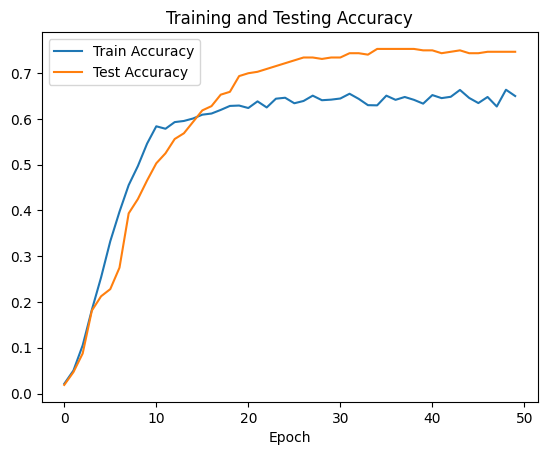

11/11 [==============================] - 2s 211ms/step - loss: 0.9560 - accuracy: 0.7414
Test Loss: 0.9560
Test Accuracy: 0.7414
1/1 [==============================] - 1s 1s/step


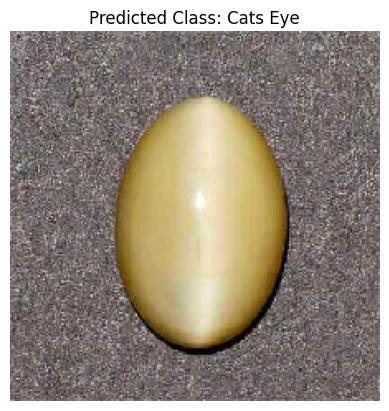

11/11 [==============================] - 2s 148ms/step


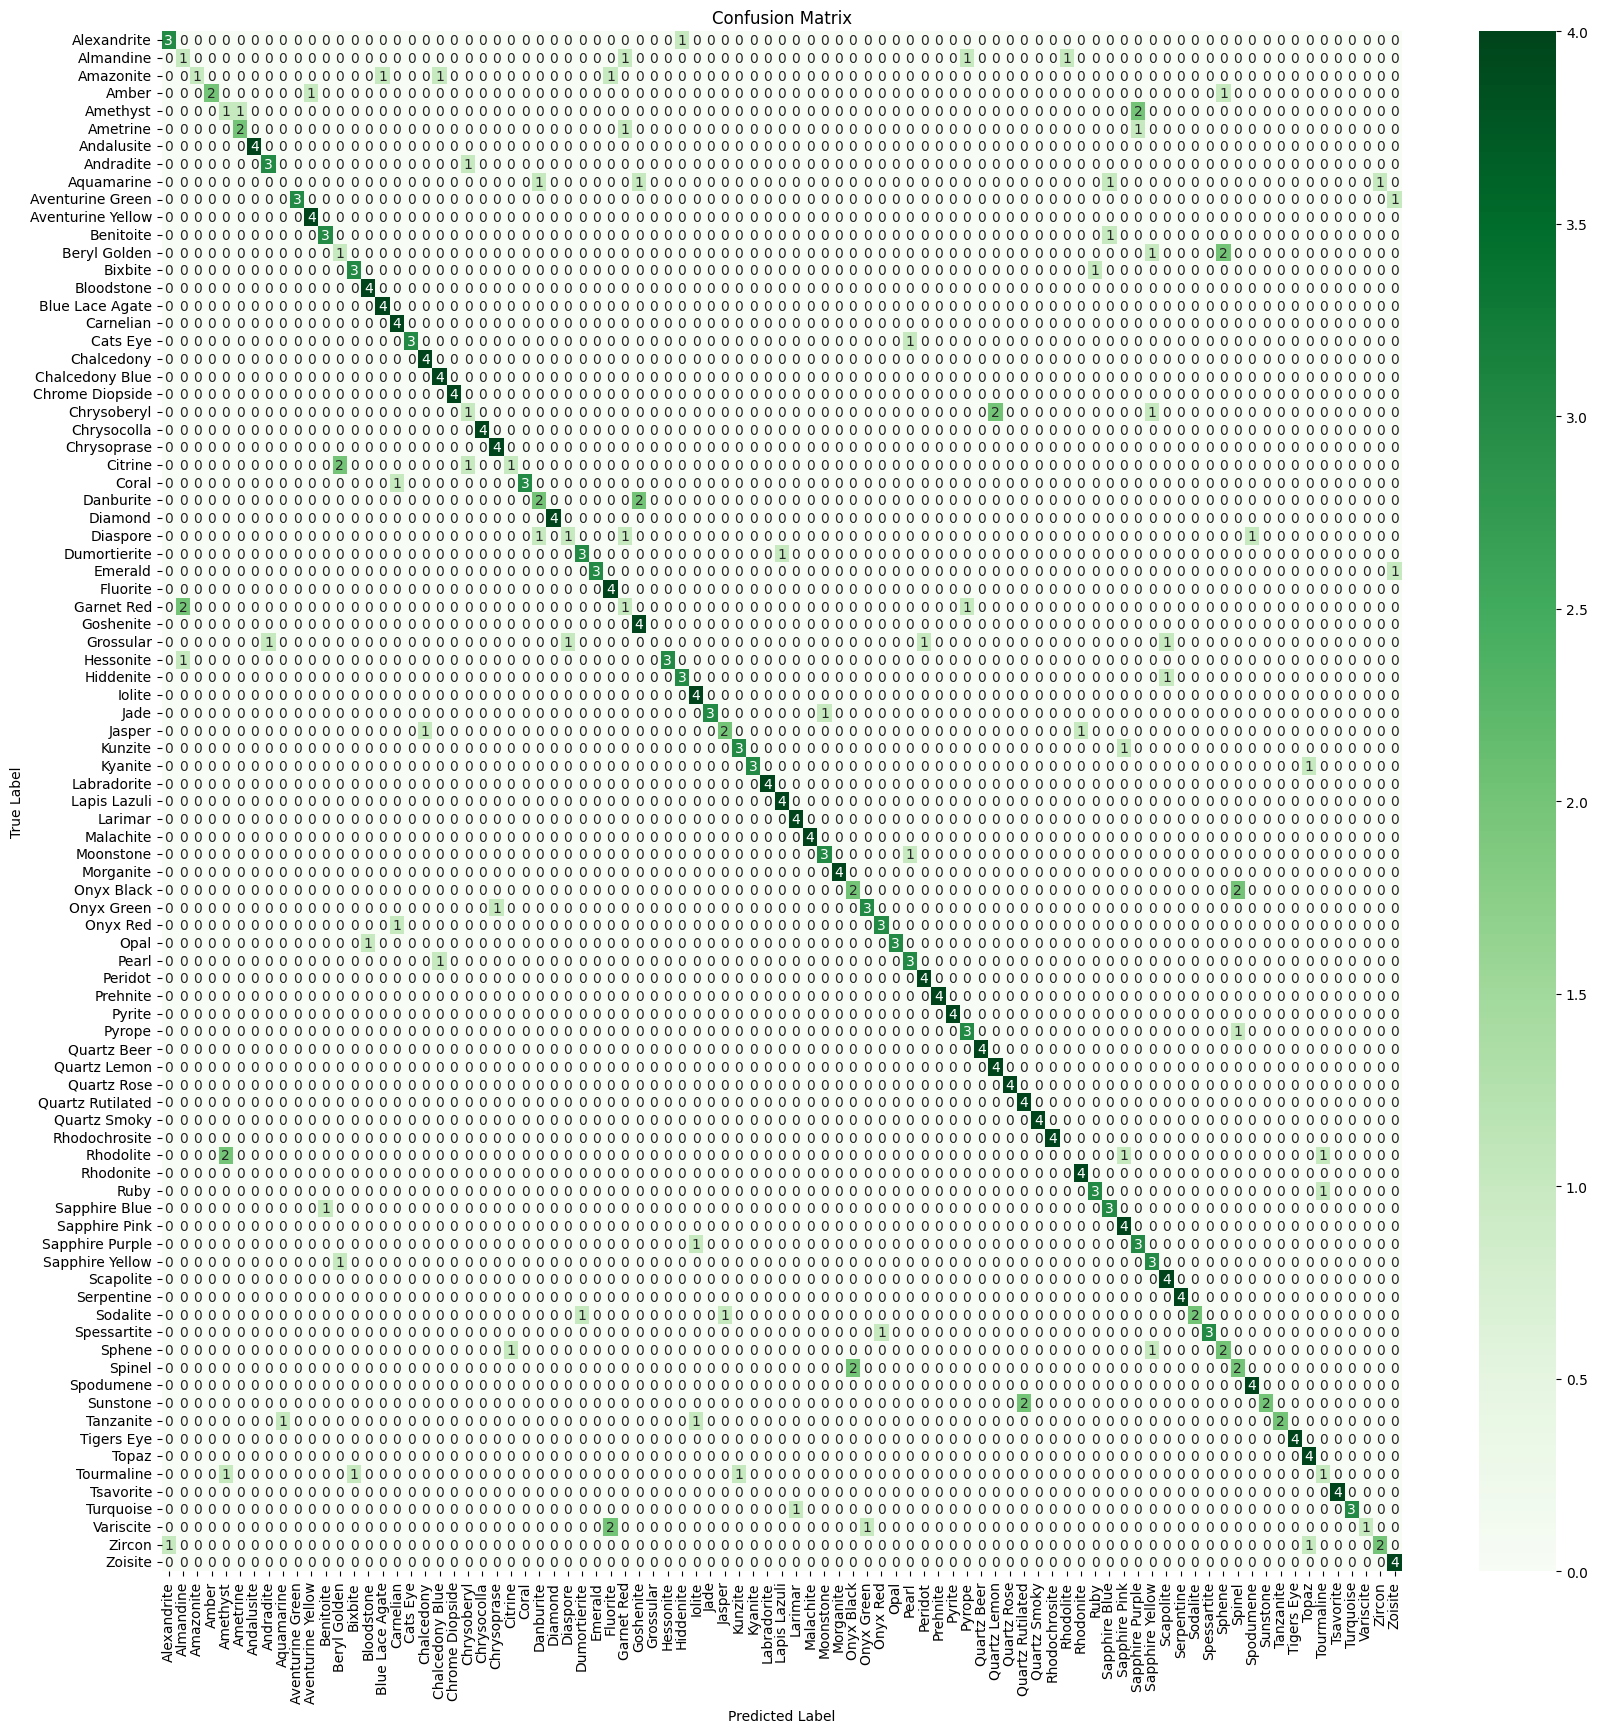

                   precision    recall  f1-score   support

      Alexandrite       0.75      0.75      0.75         4
        Almandine       0.25      0.25      0.25         4
        Amazonite       1.00      0.25      0.40         4
            Amber       1.00      0.50      0.67         4
         Amethyst       0.25      0.25      0.25         4
         Ametrine       0.67      0.50      0.57         4
       Andalusite       1.00      1.00      1.00         4
        Andradite       0.75      0.75      0.75         4
       Aquamarine       0.00      0.00      0.00         4
 Aventurine Green       1.00      0.75      0.86         4
Aventurine Yellow       0.80      1.00      0.89         4
        Benitoite       0.75      0.75      0.75         4
     Beryl Golden       0.25      0.25      0.25         4
          Bixbite       0.75      0.75      0.75         4
       Bloodstone       0.80      1.00      0.89         4
  Blue Lace Agate       0.80      1.00      0.89       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Set the seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Data paths
train_data_path = "/content/drive/MyDrive/Gemstone_images/train"
test_data_path = "/content/drive/MyDrive/Gemstone_images/test"
image_to_predict_path = "/content/drive/MyDrive/Gemstone_images/test/Cats Eye/cats eye_18.jpg"

# Constants
input_shape = (224, 224, 3)
num_classes = 87
batch_size = 32
epochs = 50

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_tensor=tf.keras.Input(shape=input_shape)
)

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Add dropout regularization
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout regularization
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Fine-tune the model
for layer in base_model.layers:
    layer.trainable = True

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate schedule
def learning_rate_schedule(epoch):
    if epoch < 10:
        return 0.0001
    elif epoch < 20:
        return 0.00001
    else:
        return 0.000001

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model and collect history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler, early_stopping]
)

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Prediction on a new image
img = tf.keras.preprocessing.image.load_img(
    image_to_predict_path,
    target_size=input_shape[:2]
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_class = train_generator.class_indices
inverse_predicted_class = dict((v, k) for k, v in predicted_class.items())
predicted_class_label = inverse_predicted_class[predicted_class_index]

# Display the image and predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_label}')
plt.show()

# Generate predictions for the test data
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
class_names = list(test_generator.class_indices.keys())
plt.figure(figsize=(20,20))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute precision, recall, F1-score, and support
classification_rep = classification_report(y_true, y_pred, target_names=class_names)
print(classification_rep)
